# DADOS - Aula 5 - Aplicação: regras de associação

## O que são regras de associação? 
"Minerar" regras de associação é encontrar padrões de itens que são comumente encontrados juntos.

Por exemplo, considere uma base de todas as transações de compras de um supermercado. São comuns compras de cerveja quando se compra carvão.

Também é comum comprar massa de tomate, macarrão e queijo ralado juntos. Em muitos casos pode ser útil descobrir essas associações.

Tais associações são da forma: "carvão => cerveja", ou seja, a compra de carvão leva à compra de cerveja com alta frequência do mesmo jeito que
"macarrão, massa de tomate => queijo ralado".

Nessas associações, temos um ou mais itens precedentes (à esquerda da seta) que se observados teremos uma boa probabilidade do item consequente (à direita da seta) ser observado também.

A seguir, vamos preparar dados para usar algoritmos para encontrar regras de associação no **Cadastro Mineiro** da **Agência Nacional de Mineração** (aqui sim no sentido literal de minerar).

Nesse cadastro temos registros relacionados aos pedidos e autorização de extração de recursos minerais. Os dados originais são encontrados em: https://dados.gov.br/dados/conjuntos-dados/sistema-de-cadastro-mineiro.

## Como encontrar regras de associação?
### Suporte e confiança

### Primeiro passo: acesso aos dados para extração de regras
O primeiro passo é carregar os dados com:

In [1]:
import pandas

# Dados originais são encontrados em: https://app.anm.gov.br/DadosAbertos/SCM/Cessoes_de_Direitos.csv
direitos = pandas.read_csv("http://www.facom.ufu.br/~albertini/dados/cessoes.csv")
direitos.head()

,Superintendencia,Processo,Tipo de requerimento,Fase Atual,CPF CNPJ do titular,Titular,Municipios,Substancias,Tipos de Uso,Situacao,Data da Cessao
0,Superintendencia / SP,820417/1982,Requerimento de Registro de Licenca,Licenciamento,00.004.212/0001-47,Serra da Lapa Extracao Comercio e Agropecuaria...,QUELUZ - SP,BASALTO,Nao informado,Sim,03/05/1994
1,Superintendencia / SP,820417/1982,Requerimento de Registro de Licenca,Licenciamento,00.004.212/0001-47,Serra da Lapa Extracao Comercio e Agropecuaria...,QUELUZ - SP,BASALTO,Nao informado,Sim,13/06/2000
2,Superintendencia / MG,833452/2012,Requerimento de Autorizacao de Pesquisa,Autorizacao de Pesquisa,00.004.212/0001-47,Serra da Lapa Extracao Comercio e Agropecuaria...,"ITAMONTE - MG, ITANHANDU - MG, POUSO ALTO - MG","ARGILA, MINERIO DE OURO","Industrial, Industrial",Sim,02/03/2017
3,Superintendencia / SP,820757/1998,Requerimento de Autorizacao de Pesquisa,Autorizacao de Pesquisa,00.022.318/0001-73,Mineracao Monte Alegre Ltda Epp,CAMPINA DO MONTE ALEGRE - SP,AREIA,Nao informado,Sim,16/08/2001
4,Superintendencia / SP,820757/1998,Requerimento de Autorizacao de Pesquisa,Autorizacao de Pesquisa,00.022.318/0001-73,Mineracao Monte Alegre Ltda Epp,CAMPINA DO MONTE ALEGRE - SP,AREIA,Nao informado,Sim,19/01/2010


Esse conjunto de dados possue as seguintes colunas:

In [2]:
direitos.columns

Index(['Superintendencia', 'Processo', 'Tipo de requerimento', 'Fase Atual',
       'CPF CNPJ do titular', 'Titular', 'Municipios', 'Substancias',
       'Tipos de Uso', 'Situacao', 'Data da Cessao'],
      dtype='object')

com as seguintes características por coluna.
Identifique:

1.   Quantas empresas fizeram algum tipo de requerimento?
2.   Quantas substâncias (ou conjuntos de substâncias) distintas foram listadas?
3.   Qual substância mais frequente?


In [3]:
direitos.describe()

,Superintendencia,Processo,Tipo de requerimento,Fase Atual,CPF CNPJ do titular,Titular,Municipios,Substancias,Tipos de Uso,Situacao,Data da Cessao
count,40167,40167,40167,40167,40166,40166,40153,40160,40160,40167,40167
unique,25,30048,16,8,11285,11260,6486,1982,605,1,3591
top,Superintendencia / MG,866659/2016,Requerimento de Autorizacao de Pesquisa,Autorizacao de Pesquisa,01.637.895/0001-32,Votorantim Cimentos S A,ECOPORANGA - ES,GRANITO,Nao informado,Sim,09/05/2017
freq,9676,21,34827,13447,943,943,279,4921,11862,40167,221


#### Para treinar: explore os dados
Procure no "Dicionário de Dados" em https://dados.gov.br/dados/conjuntos-dados/sistema-de-cadastro-mineiro o que significa "Situação: Sim ou Não".
Devemos remover essa coluna pois tem somente um tipo de valor: 'Sim'. Como fazer?

In [4]:
del direitos['Situacao']
direitos.dropna(inplace = True) # remove linhas contendo algum NaN
direitos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40152 entries, 0 to 40165
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Superintendencia      40152 non-null  object
 1   Processo              40152 non-null  object
 2   Tipo de requerimento  40152 non-null  object
 3   Fase Atual            40152 non-null  object
 4   CPF CNPJ do titular   40152 non-null  object
 5   Titular               40152 non-null  object
 6   Municipios            40152 non-null  object
 7   Substancias           40152 non-null  object
 8   Tipos de Uso          40152 non-null  object
 9   Data da Cessao        40152 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


Usando as funções estudadas na aula passada, escreva um código para converter a coluna `Data da Cessao` em um tipo de dados que guarda informações de data na forma que é mais adequada:

In [6]:
direitos['Data da Cessao'] = pandas.to_datetime(direitos['Data da Cessao'], format='%d/%m/%Y')

direitos = direitos.sort_values(by='Data da Cessao')
direitos['Data da Cessao']

10818   1939-10-30
8776    1941-09-13
22236   1943-12-01
32389   1944-12-05
10819   1949-03-16
           ...    
34746   2019-05-30
21003   2019-05-30
33646   2019-05-30
38031   2019-05-31
13453   2019-05-31
Name: Data da Cessao, Length: 40152, dtype: datetime64[ns]

Use a função `histogram()` do módulo `plotly.express` na coluna de datas das cessões com o parâmetro `nbins=50` para obter a evolução das cessões ao longo dos anos:

In [7]:
import plotly.express as px
figEvolucao = px.histogram(direitos['Data da Cessao'])
figEvolucao.show()

Existem outras bibliotecas de visualização:

<Axes: xlabel='Data da Cessao', ylabel='Count'>

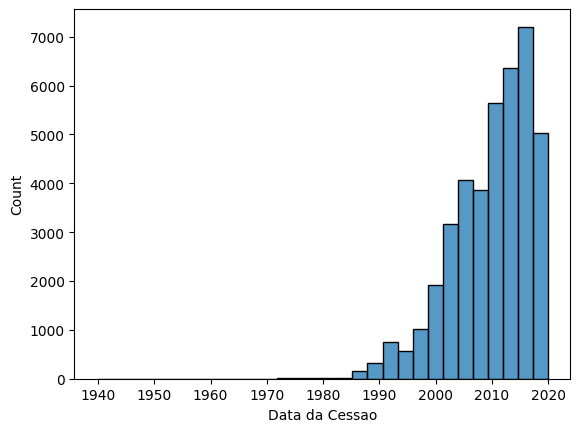

In [ ]:
import seaborn as sns
sns.histplot(direitos['Data da Cessao'], bins=30)

A seguir, escreva um código que identifique quais tipos (únicos) de requerimento existem nesse cadastro.

In [ ]:
direitos [ PREENCHA AQUI]...

array(['Requerimento de Registro de Licenca',
       'Requerimento de Autorizacao de Pesquisa',
       'Requerimento de Disponibilidade para lavra',
       'Requerimento de Disponibilidade para pesquisa',
       'Requerimento de Manifesto de Mina',
       'Requerimento de Cessao parcial',
       'Requerimento de Mudanca de Regime para Aut. de Pesquisa',
       'Requerimento de Mudanca de Regime para Licenciamento',
       'Requerimento de Lavra Garimpeira',
       'Requerimento de Disponibilidade para Lavra Garimpeira',
       'Requerimento de Grupamento Mineiro',
       'Requerimento de Consorcio de Mineracao',
       'Requerimento de Desmembramento', 'Requerimento de Lavra',
       'Requerimento de Mudanca de Regime para PLG',
       'Requerimento de Cessao total'], dtype=object)

A seguir, escreva um código que identifique quantas cidades (ou grupos de cidades) diferentes contém minérios para exploração. Use as funções `groupby()` e `count()`:

In [ ]:
direitos.groupby(PREENCHA AQUI).Municipios.count().sort_values(ascending=False).head(25)

Municipios
ECOPORANGA - ES                     279
NOSSA SENHORA DO LIVRAMENTO - MT    234
CACHOEIRO DE ITAPEMIRIM - ES        231
LINHARES - ES                       224
BARRA DE SAO FRANCISCO - ES         208
POCOS DE CALDAS - MG                193
UBERABA - MG                        186
RIO BRANCO DO SUL - PR              182
NOVA VENECIA - ES                   182
COLATINA - ES                       175
ITAITUBA - PA                       161
NIQUELANDIA - GO                    156
PONTA GROSSA - PR                   141
DIAMANTINA - MG                     133
POCONE - MT                         124
RIO CLARO - SP                      115
CASTELO - ES                        115
OURO PRETO - MG                     111
LAGOA DOS PATOS - RS                110
BRASILIA - DF                       103
TREMEMBE - SP                       101
ARCOS - MG                          101
CASTRO - PR                         100
SEROPEDICA - RJ                      99
JAGUARUNA - SC               

Encontre o número de requerimentos em "UBERLANDIA - MG":

In [ ]:
direitos.query( PREENCHA AQUI)

Escreva um código que selecione somente o CNPJ e as substâncias exploradas em uma nova tabela removendo as linhas NA:

In [ ]:
mineriosExplorados = direitos[ PREENCHA AQUI].dropna()
mineriosExplorados

### Definição do objetivo
Porteriormente, devemos formular nossa pergunta aos dados:
**quais são os minérios que empresas comumente exploram juntos?**

Para responder a essa pergunta devemos criar uma tabela que contenha os minérios explorados por cada CPF/CNPJ da seguinte forma.
Minérios explorados em cada cessão estão listados na coluna `Substancias` e separados por vírgulas.

In [ ]:
mineriosExplorados.query("Substancias.str.contains(',')")
mineriosExplorados.Substancias = mineriosExplorados.Substancias.str.split("[ ]*,[ ]*")
mineriosExplorados = mineriosExplorados[mineriosExplorados.Substancias.apply(lambda x: len(set(x)) > 1)]
mineriosExplorados.Substancias = mineriosExplorados.Substancias.apply(lambda x: set(x))
mineriosExplorados

#### Para treinar

Vamos usar os métodos `mineriosExplorados.apply( pandas.Series.explode ) ` e `drop_duplicates()` para criar uma tabela que tem um minérios por linha e remover repetições de pares CNPJ e minérios explorados:

In [ ]:
mineriosExploradosUmPorLinha = mineriosExplorados.reset_index().apply( pandas.Series.explode )#.drop_duplicates().reset_index()
mineriosExploradosUnicos = mineriosExploradosUmPorLinha.drop_duplicates().drop(columns=['index'])
mineriosExploradosUnicos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CPF CNPJ do titular,Substancias
0,83.286.500/0001-69,CARVAO MINERAL
0,83.286.500/0001-69,ARGILA
0,83.286.500/0001-69,AREIA
1,83.286.500/0001-69,CARVAO MINERAL
1,83.286.500/0001-69,ARGILA
...,...,...
10833,05.642.709/0001-04,MINERIO DE FERRO
10834,895.240.203-00,FOSFATO
10834,895.240.203-00,CALCARIO
10835,895.240.203-00,FOSFATO


## Tarefa: mineração de regras de associação

Comumente, regras de associação são extraídas de conjuntos de transações. No nosso caso, uma transação é representada pelo conjunto de minérios explorados pelo mesmo CNPJ.
Devemos carregar o pacote `mlxtend` para minerar regras de associação:


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules

te = TransactionEncoder()
te_ary = te.fit(mineriosExplorados.Substancias).transform(mineriosExplorados.Substancias)
transacoes = pandas.DataFrame(te_ary, columns = te.columns_)

transacoes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,AGALMATOLITO,AGUA MARINHA,AGUA MINERAL,AGUA MINERAL RAD. FON,AGUA POTAVEL DE MESA,AGUAS TERMAIS,ALEXANDRITA,ALUMINIO,ALUVIAO AURIFERO,ALUVIAO DIAMANTIFERO,...,TURMALINA,VANADIO,VERMICULITA,WOLFRAMIO,WOLFRAMITA,XISTO,ZINCO,ZIRCAO,ZIRCONIO,ZIRCONITA
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Agora que os dados estão preparados executados o algoritmo de mineração de regras de associação para procurar pelos padrões que têm um suporte mínimo igual a 0.8, ou seja, que repetem ao menos em 80% dos dados.

Alguns itens aparecem com maior frequência que outros. Podemos listá-los e visualizá-los.

In [ ]:
mineriosExploradosUmPorLinha = mineriosExplorados.reset_index().apply( pandas.Series.explode )
frequencias = mineriosExploradosUmPorLinha.Substancias.value_counts()
frequencias


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AREIA                4959
ARGILA               3262
MINERIO DE OURO      1350
GRANITO              1287
CASCALHO             1149
                     ... 
DUNITO                  1
MONZOGRANITO            1
CALCARIO P/ BRITA       1
GIBBSITA                1
HELIODORO               1
Name: Substancias, Length: 259, dtype: int64

#### Para treinar
Podemos usar o método função `nlargest()` do `DataFrame` do pandas para obter as 20 substâncias mais exploradas:

In [ ]:
frequencias.nlargest( PREENCHA AQUI)


### Suporte

Suporte é o número de vezes que um conjunto de itens (minérios) aparece em diferentes transações (empresas).
Esse suporte pode ser absoluto, se for uma contagem simples, ou relativo, se for uma proporção do número de transações da base de dados.

O primeiro passo de um método de mineração de regras é encontrar conjuntos de itens que são frequentes nas transações.
No nosso caso queremos obter os conjuntos de minérios que são extraídos com alta frequência pelas mesmas empresas.
O suporte mínimo define o que é a alta frequência. Caso o suporte de um conjunto de minérios seja maior que o `suporteMinimo` então é considerado frequente.

In [ ]:
suporteMinimo = 0.001 # proporcao minima da transacoes que apresenta os itens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



O segundo passo para mineração de regras é definir a confiança mínima de uma regra do tipo `antecedentes => consequentes`. Em uma boa regra, encontrar o antecedente indica uma boa chance de também encontrar os consequentes.
Se uma regra "ouro, prata => ferro" tiver confiança igual a 0.8 significa que 80% das empresas que extraem ouro e prata também extraem ferro.

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

minerios_frequentes = fpgrowth(transacoes, min_support = suporteMinimo, use_colnames=True)
minerios_frequentes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,support,itemsets
0,0.457641,(AREIA)
1,0.301034,(ARGILA)
2,0.004337,(CARVAO MINERAL)
3,0.014858,(DOLOMITO)
4,0.007383,(TALCO)
...,...,...
545,0.001015,"(PETALITA, FELDSPATO)"
546,0.001753,"(MINERIO DE PLATINA, MINERIO DE FERRO)"
547,0.001200,"(MINERIO DE TUNGSTENIO, MINERIO DE OURO)"
548,0.001015,"(MINERIO DE MOLIBDENIO, MINERIO DE TUNGSTENIO)"


Esses valores são úteis para a mineração de regras dar atenção apenas às conjuntos de itens e regras de maior interesse.

In [ ]:
confiancaMinima = 0.6
regras = association_rules(minerios_frequentes, metric="confidence", min_threshold = confiancaMinima)
regras.query("lift > 500")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
166,"(MINERIO DE ZINCO, MINERIO DE PRATA, MINERIO D...","(MINERIO DE COBRE, MINERIO DE CHUMBO)",0.001292,0.001938,0.001292,1.000000,516.0,0.001289,inf,0.999353
177,"(MINERIO DE COBRE, MINERIO DE CHUMBO)","(MINERIO DE ZINCO, MINERIO DE PRATA, MINERIO D...",0.001938,0.001292,0.001292,0.666667,516.0,0.001289,2.996124,1.000000


Para explorar as regras produzidas fazemos:

In [ ]:
regras["antecedent_len"] = regras["antecedents"].apply(lambda x: len(x))
regras


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,"(CHUMBO, COBRE)",(ZINCO),0.001292,0.003691,0.001200,0.928571,251.550000,0.001195,13.948320,0.997313,2
1,"(COBRE, ZINCO)",(CHUMBO),0.001292,0.003876,0.001200,0.928571,239.571429,0.001195,13.945736,0.997114,2
2,"(TURFA, TERRAS RARAS)",(ARGILA),0.001477,0.301034,0.001477,1.000000,3.321888,0.001032,inf,0.700000,2
3,"(TERRAS RARAS, ARGILA)",(TURFA),0.001477,0.044943,0.001477,1.000000,22.250513,0.001410,inf,0.956470,2
4,"(TURFA, TERRAS RARAS)",(AREIA),0.001477,0.457641,0.001477,1.000000,2.185118,0.000801,inf,0.543161,2
...,...,...,...,...,...,...,...,...,...,...,...
112,"(TURMALINA, MINERIO DE BERILIO)","(FELDSPATO, QUARTZO)",0.006091,0.020303,0.005722,0.939394,46.269421,0.005598,16.165006,0.984383,2
113,(PETALITA),(FELDSPATO),0.001015,0.036822,0.001015,1.000000,27.157895,0.000978,inf,0.964157,1
114,(MINERIO DE PLATINA),(MINERIO DE FERRO),0.001846,0.043005,0.001753,0.950000,22.090558,0.001674,19.139904,0.956497,1
115,(MINERIO DE MOLIBDENIO),(MINERIO DE TUNGSTENIO),0.001015,0.002953,0.001015,1.000000,338.625000,0.001012,inf,0.998060,1


Buscando por um antecedente com pelo menos 2 minerais, confiança maior que 0.75 e lift maior que 1:

In [ ]:
regras[ (regras['antecedent_len'] >= 1) &
       (regras['confidence'] > .95) &
       (regras['lift'] > 5500) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
1964,(TELURIO),"(BISMUTO, OURO)",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,1
3188,"(MINERIO DE COBRE, MINERIO DE FERRO, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE PRATA)",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3192,"(MINERIO DE PRATA, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE COBRE, MINERI...",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,2
3213,"(MINERIO DE OURO, MINERIO DE FERRO, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE PRATA)",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3237,"(MINERIO DE OURO, MINERIO DE COBRE, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE PRATA)",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3292,"(MINERIO DE OURO, MINERIO DE COBRE, MINERIO DE...","(MINERIO DE MANGANES, MINERIO DE PRATA)",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,4
3304,"(MINERIO DE OURO, MINERIO DE PRATA, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE COBRE, MINERI...",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3309,"(MINERIO DE OURO, MINERIO DE FERRO, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE COBRE, MINERI...",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3310,"(MINERIO DE COBRE, MINERIO DE FERRO, CALCARIO)","(MINERIO DE MANGANES, MINERIO DE OURO, MINERIO...",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3
3311,"(MINERIO DE OURO, MINERIO DE COBRE, CALCARIO)","(MINERIO DE FERRO, MINERIO DE MANGANES, MINERI...",0.000125,0.000149,0.000125,1.0,6692.0,0.000125,inf,0.999975,3


#### Para treinar

Reduza gradualmente o valor de confiança mínima e explore as regras produzidas. Teste a seguir:

## Especializando regras

Podemos refinar nossa exploração em alguns itens específicos. Por exempo "MINERIO DE NIOBIO" ou "TERRAS RARAS".

In [ ]:
regras[regras['consequents'] == {'MINERIO DE OURO'}]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
60,(MINERIO DE PRATA),(MINERIO DE OURO),0.007567,0.124585,0.005722,0.756098,6.068943,0.004779,3.589203,0.841595
61,"(MINERIO DE PRATA, MINERIO DE COBRE)",(MINERIO DE OURO),0.002861,0.124585,0.002861,1.000000,8.026667,0.002504,inf,0.877927
62,"(MINERIO DE PRATA, MINERIO DE FERRO)",(MINERIO DE OURO),0.001661,0.124585,0.001661,1.000000,8.026667,0.001454,inf,0.876872
64,"(MINERIO DE COBRE, MINERIO DE PRATA, MINERIO D...",(MINERIO DE OURO),0.001384,0.124585,0.001384,1.000000,8.026667,0.001212,inf,0.876629
103,"(MINERIO DE PRATA, MINERIO DE CHUMBO)",(MINERIO DE OURO),0.001938,0.124585,0.001753,0.904762,7.262222,0.001512,9.191860,0.863975
105,"(MINERIO DE COBRE, MINERIO DE CHUMBO)",(MINERIO DE OURO),0.001938,0.124585,0.001753,0.904762,7.262222,0.001512,9.191860,0.863975
110,"(MINERIO DE PRATA, MINERIO DE CHUMBO, MINERIO ...",(MINERIO DE OURO),0.001569,0.124585,0.001569,1.000000,8.026667,0.001373,inf,0.876791
121,"(MINERIO DE ZINCO, MINERIO DE COBRE)",(MINERIO DE OURO),0.001569,0.124585,0.001384,0.882353,7.082353,0.001189,7.441030,0.860153
123,"(MINERIO DE ZINCO, MINERIO DE COBRE, MINERIO D...",(MINERIO DE OURO),0.001569,0.124585,0.001384,0.882353,7.082353,0.001189,7.441030,0.860153
135,"(MINERIO DE ZINCO, MINERIO DE PRATA)",(MINERIO DE OURO),0.001477,0.124585,0.001292,0.875000,7.023333,0.001108,7.003322,0.858886


#### Para treinar

Refaça a mineração de regras para "MINERIO DE NIOBIO". Tente reduzir o suporte e confiança mínimos para obter resultados.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Procure pelas regras que contém "TERRAS RARAS" no antecedente usando "rhs" no lugar de "lhs":